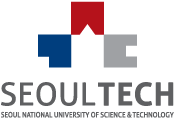

# Lab Session \# 07


---


by Prof. Josué Obregón <br>
Data Analysis for Electronic Manufacturing <br>
Department of Data Science - SeoulTech<br>

## Objectives

The objective of this worksheet is to introduce the student to different type of techniques and functions for model assesing and model selection.

## Importing libraries


The libraries we'll import to start with are pandas and numpy for data handling, and matplotlib, seaborn, and plotly for display generation.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("darkgrid")

Donwnload the files that we will use

In [3]:
!mkdir data

In [4]:
import gdown

urls = ['https://drive.google.com/uc?export=download&id=1NnDVngq_4OlIeMHHAZ8miD_isbfF6B5V', # autoMPG6  https://drive.google.com/file/d/1NnDVngq_4OlIeMHHAZ8miD_isbfF6B5V/view?usp=sharing
        ]
outputs = ['autoMPG6.csv']
for url,output in zip(urls,outputs):
  gdown.download(url, f'data/{output}', quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1NnDVngq_4OlIeMHHAZ8miD_isbfF6B5V
To: /content/data/autoMPG6.csv
100%|██████████| 10.7k/10.7k [00:00<00:00, 14.2MB/s]


# Pipes

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.linear_model import LinearRegression

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

In [6]:
df = pd.read_csv('data/autoMPG6.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Displacement  392 non-null    float64
 1   Horse_power   392 non-null    int64  
 2   Weight        392 non-null    int64  
 3   Acceleration  392 non-null    float64
 4   Model_year    392 non-null    int64  
 5   Mpg           392 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 18.5 KB


In [7]:
df.head()

,Displacement,Horse_power,Weight,Acceleration,Model_year,Mpg
0,91.0,70,1955,20.5,71,26.0
1,232.0,100,2789,15.0,73,18.0
2,350.0,145,4055,12.0,76,13.0
3,318.0,140,4080,13.7,78,17.5
4,113.0,95,2372,15.0,70,24.0


In [11]:
X = df[['Horse_power', 'Displacement']]
y = df['Mpg']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=712)

In [14]:
pipe = Pipeline([
    ('minmax', MinMaxScaler()),
    ('lr', LinearRegression())
 ])

pipe

Pipeline(steps=[('minmax', MinMaxScaler()), ('lr', LinearRegression())])

In [16]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('minmax', MinMaxScaler()), ('lr', LinearRegression())])

In [18]:
y_pred = pipe.predict(X_test)

In [19]:
y_pred

array([20.40323958, 12.50294384, 21.47059155,  6.30851999, 31.4449213 ,
       26.38797552, 27.92609709, 27.76333005, 28.17995904, 22.44410177,
       28.64350891,  6.30851999, 28.68888375, 27.61620329, 27.74236126,
       29.84389336, 25.67932947, 23.81378257, 29.33651467, 29.77565848,
       22.84594607, 25.964472  , 23.75276744, 26.98988638, 30.21136503,
       22.16359731, 13.62443641, 23.1142475 , 31.09841842, 25.964472  ,
       23.26292028, 28.64350891, 12.45258571, 29.63918873, 20.78824279,
       29.84733062, 14.54999011, 11.34673343, 29.64262599,  9.55440469,
       11.12380683, 23.45662269, 16.73917986, 21.75075079,  5.04866642,
       13.91147018, 24.11645663, 28.68733773, 28.4826331 , 17.7668307 ,
       13.86764135, 17.30602766, 15.44082598, 15.44082598, 13.1852926 ,
       29.84389336,  5.42834112, 28.18150507, 22.16359731,  5.04866642,
       25.61951514, 16.80741474, 28.68200923, 21.51974887, 21.47059155,
       27.15076219, 21.51974887, 12.28379972, 27.80183037, 14.98

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [33]:
def print_reg_metrics(y_test, y_pred):
  print(f'MSE: {mean_squared_error(y_test, y_pred)}')
  print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
  print(f'MAPE: {mean_absolute_percentage_error(y_test, y_pred)}')
  print(f'R2: {r2_score(y_test, y_pred)}')

In [34]:
print_reg_metrics(y_test, y_pred)

MSE: 22.276320809518445
MAE: 3.6639010798641363
MAPE: 0.17018787218241435
R2: 0.6762237776793226


In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
pipe_poly = Pipeline([
    ('polynomial', PolynomialFeatures(degree=4)),
    ('scaling', StandardScaler()),
    ('lr', LinearRegression())
])

In [39]:
pipe_poly.fit(X_train, y_train)
y_pred = pipe_poly.predict(X_test)
print_reg_metrics(y_test, y_pred)

MSE: 15.434668377171832
MAE: 3.006037515234586
MAPE: 0.1295843289634796
R2: 0.7756640936057184


## Using other predictors

# Validation set

In [46]:
%%time
mses = []
for i in range(10):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=i)

  mses_deg = []
  for degree in [2,4,6,8]:

    pipe_poly = Pipeline([
    ('polynomial', PolynomialFeatures(degree=degree)),
    ('scaling', StandardScaler()),
    ('lr', LinearRegression())
])
    pipe_poly.fit(X_train, y_train)
    y_pred_deg = pipe_poly.predict(X_test)
    mse_deg = mean_squared_error(y_test, y_pred_deg)
    mses_deg.append(mse_deg)
  mses.append(mses_deg)

CPU times: user 370 ms, sys: 267 ms, total: 637 ms
Wall time: 339 ms


In [47]:
np.array(mses)

array([[  20.64491276,   19.3776775 ,   20.44498238,   16.88254219],
       [  14.35630055,   13.14853963,  203.20423261,   21.24939505],
       [  18.33292431,   18.34970319,   18.53930519,   21.88858962],
       [  11.48146878,   10.71370145,   22.78161178,  326.29993166],
       [  12.40600657,   11.9151866 ,   13.53030068, 4326.48718682],
       [  11.34679688,   11.18558647,   18.22425352,   34.64317818],
       [  19.11644007,   18.33269323,   27.1210459 ,   24.42567094],
       [  16.24594479,   16.04037234,  275.17240048, 2129.04505615],
       [  14.29863678,   12.77469289,   13.68611101,   16.51939456],
       [  19.12276663,   19.9453283 ,   60.3155837 ,   46.9600065 ]])

In [52]:
results = pd.DataFrame(mses, columns=['2', '4', '6', '8'])
results

,2,4,6,8
0,20.644913,19.377678,20.444982,16.882542
1,14.356301,13.148540,203.204233,21.249395
2,18.332924,18.349703,18.539305,21.888590
3,11.481469,10.713701,22.781612,326.299932
4,12.406007,11.915187,13.530301,4326.487187
5,11.346797,11.185586,18.224254,34.643178
6,19.116440,18.332693,27.121046,24.425671
7,16.245945,16.040372,275.172400,2129.045056
8,14.298637,12.774693,13.686111,16.519395
9,19.122767,19.945328,60.315584,46.960007


<Axes: >

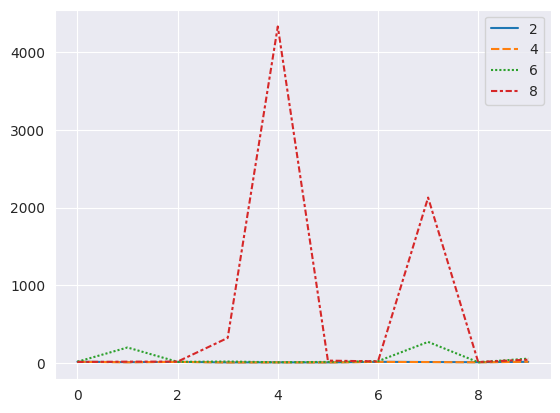

In [53]:
sns.lineplot(data=results)

In [54]:
%%time
mses = []
for i in range(10):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=i)

  mses_deg = []
  for degree in [2,3,4,5]:

    pipe_poly = Pipeline([
    ('polynomial', PolynomialFeatures(degree=degree)),
    ('scaling', StandardScaler()),
    ('lr', LinearRegression())
])
    pipe_poly.fit(X_train, y_train)
    y_pred_deg = pipe_poly.predict(X_test)
    mse_deg = mean_squared_error(y_test, y_pred_deg)
    mses_deg.append(mse_deg)
  mses.append(mses_deg)

CPU times: user 493 ms, sys: 0 ns, total: 493 ms
Wall time: 513 ms


In [55]:
results = pd.DataFrame(mses, columns=['2', '3', '4', '5'])
results

,2,3,4,5
0,20.644913,20.093631,19.377678,18.218462
1,14.356301,13.964324,13.148540,12.230505
2,18.332924,19.462724,18.349703,17.694301
3,11.481469,10.602318,10.713701,9.526918
4,12.406007,10.179192,11.915187,10.426473
5,11.346797,10.584894,11.185586,11.799223
6,19.116440,19.028257,18.332693,17.901857
7,16.245945,14.158935,16.040372,14.259926
8,14.298637,13.250021,12.774693,13.445033
9,19.122767,19.227381,19.945328,20.128751


<Axes: >

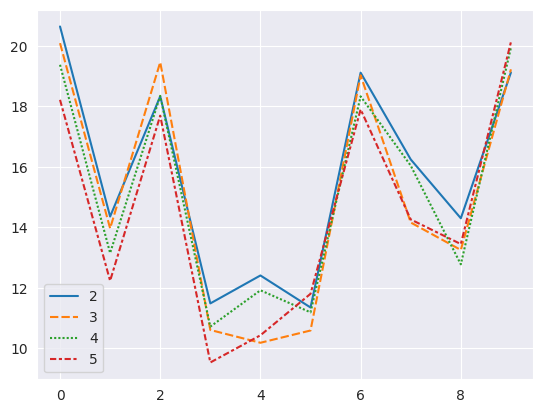

In [56]:
sns.lineplot(data=results)

# Cross-validation

In [57]:
from sklearn.model_selection import KFold, LeaveOneOut

In [59]:
cv = KFold(n_splits=10, shuffle=True, random_state=712)
cv

KFold(n_splits=10, random_state=712, shuffle=True)

In [65]:
mses_cv=[]
for train_index, test_index in cv.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y[train_index], y[test_index]

  pipe_poly = Pipeline([
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaling', StandardScaler()),
    ('lr', LinearRegression())
  ])
  pipe_poly.fit(X_train, y_train)
  y_pred_cv = pipe_poly.predict(X_test)
  mses_cv.append(mean_squared_error(y_test, y_pred_cv))

print(np.array(mses_cv).shape)
print(f'MSE CV: {np.array(mses_cv).mean()}')

(10,)
MSE CV: 15.914190709416355


## Leave one out cross-validation

In [66]:
from sklearn.model_selection import KFold, LeaveOneOut

In [67]:
cv = KFold(n_splits=10, shuffle=True, random_state=712)
cv

KFold(n_splits=10, random_state=712, shuffle=True)

In [68]:
cv = LeaveOneOut()

In [69]:
%%time
mses_cv=[]
for train_index, test_index in cv.split(X):
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y[train_index], y[test_index]

  pipe_poly = Pipeline([
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaling', StandardScaler()),
    ('lr', LinearRegression())
  ])
  pipe_poly.fit(X_train, y_train)
  y_pred_cv = pipe_poly.predict(X_test)
  mses_cv.append(mean_squared_error(y_test, y_pred_cv))

print(np.array(mses_cv).shape)
print(f'MSE CV: {np.array(mses_cv).mean()}')

(392,)
MSE CV: 16.016726569668208
CPU times: user 3.36 s, sys: 7.56 ms, total: 3.36 s
Wall time: 3.4 s
